### Importación de datos



In [26]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [58]:


ingreso_total_tienda1 = tienda['Precio'].sum()
ingreso_total_tienda2 = tienda2['Precio'].sum()
ingreso_total_tienda3 = tienda3['Precio'].sum()
ingreso_total_tienda4 = tienda4['Precio'].sum()

print(f"Ingreso total Tienda 1: {ingreso_total_tienda1}")
print(f"Ingreso total Tienda 2: {ingreso_total_tienda2}")
print(f"Ingreso total Tienda 3: {ingreso_total_tienda3}")
print(f"Ingreso total Tienda 4: {ingreso_total_tienda4}")

Ingreso total Tienda 1: 1150880400.0
Ingreso total Tienda 2: 1116343500.0
Ingreso total Tienda 3: 1098019600.0
Ingreso total Tienda 4: 1038375700.0


# 2. Ventas por categoría

In [28]:
ventas_por_categoria = tienda.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

print("--- Ventas Totales por Categoría (las más populares primero) ---")
print(ventas_por_categoria)
print("\n")

--- Ventas Totales por Categoría (las más populares primero) ---
Categoría del Producto
Electrónicos               429493500.0
Electrodomésticos          363685200.0
Muebles                    187633700.0
Instrumentos musicales      91299000.0
Deportes y diversión        39290000.0
Juguetes                    17995700.0
Artículos para el hogar     12698400.0
Libros                       8784900.0
Name: Precio, dtype: float64




# 3. Calificación promedio de la tienda


In [57]:

tienda_promedio = tienda['Calificación'].mean()
tienda2_promedio = tienda2['Calificación'].mean()
tienda3_promedio = tienda3['Calificación'].mean()
tienda4_promedio = tienda4['Calificación'].mean()

print(f"Calificación promedio de la tienda 1: {tienda_promedio:.2f}")
print(f"Calificación promedio de la tienda 2: {tienda2_promedio:.2f}")
print(f"Calificación promedio de la tienda 3: {tienda3_promedio:.2f}")
print(f"Calificación promedio de la tienda 4: {tienda4_promedio:.2f}")

Calificación promedio de la tienda 1: 3.98
Calificación promedio de la tienda 2: 4.04
Calificación promedio de la tienda 3: 4.05
Calificación promedio de la tienda 4: 4.00


# 4. Productos más y menos vendidos

In [59]:
def analyze_product_sales(df, store_name):

    product_sales = df.groupby('Producto')['Precio'].sum()


    most_sold = product_sales.nlargest(5)
    least_sold = product_sales.nsmallest(5)

    print(f"--- Productos Más Vendidos en {store_name} ---")
    print(most_sold)

    print(f"--- Productos Menos Vendidos en {store_name} ---")
    print(least_sold)

analyze_product_sales(tienda, "Tienda 1")
analyze_product_sales(tienda2, "Tienda 2")
analyze_product_sales(tienda3, "Tienda 3")
analyze_product_sales(tienda4, "Tienda 4")

--- Productos Más Vendidos en Tienda 1 ---
Producto
TV LED UHD 4K       142150200.0
Refrigerador        112143300.0
Iphone 15            97902200.0
Smart TV             67452100.0
Lavadora de ropa     65783600.0
Name: Precio, dtype: float64
--- Productos Menos Vendidos en Tienda 1 ---
Producto
Cuerda para saltar     652800.0
Dinosaurio Rex         688900.0
Cubo mágico 8x8        696900.0
Set de vasos          1359100.0
Ajedrez de madera     1430600.0
Name: Precio, dtype: float64
--- Productos Más Vendidos en Tienda 2 ---
Producto
Iphone 15           113225800.0
TV LED UHD 4K       103375000.0
Refrigerador         97632500.0
Lavadora de ropa     66762300.0
Smart TV             61142000.0
Name: Precio, dtype: float64
--- Productos Menos Vendidos en Tienda 2 ---
Producto
Cubo mágico 8x8        643600.0
Dinosaurio Rex         770300.0
Cuerda para saltar     856900.0
Ajedrez de madera     1287700.0
Set de vasos          1542600.0
Name: Precio, dtype: float64
--- Productos Más Vendidos en Ti

# 5. Envío promedio por tienda

In [31]:

tienda_envio_promedio = tienda['Costo de envío'].mean()
tienda2_envio_promedio = tienda2['Costo de envío'].mean()
tienda3_envio_promedio = tienda3['Costo de envío'].mean()
tienda4_envio_promedio = tienda4['Costo de envío'].mean()

print(f"Costo de envío promedio de la tienda 1: {tienda_envio_promedio:.2f}")
print(f"Costo de envío promedio de la tienda 2: {tienda2_envio_promedio:.2f}")
print(f"Costo de envío promedio de la tienda 3: {tienda3_envio_promedio:.2f}")
print(f"Costo de envío promedio de la tienda 4: {tienda4_envio_promedio:.2f}")

Costo de envío promedio de la tienda 1: 26018.61
Costo de envío promedio de la tienda 2: 25216.24
Costo de envío promedio de la tienda 3: 24805.68
Costo de envío promedio de la tienda 4: 23459.46


# 7.- Graficacion

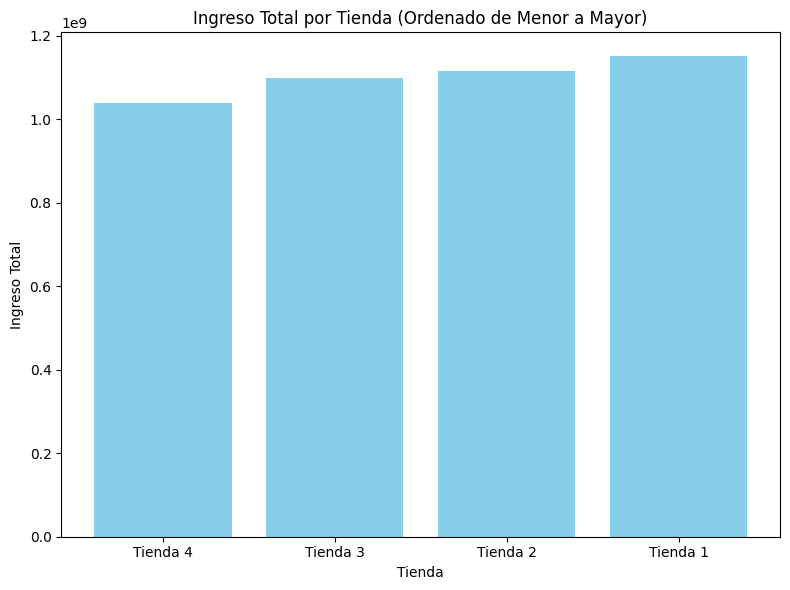

In [60]:

import matplotlib.pyplot as plt

ingresos_por_tienda = {
    'Tienda 1': ingreso_total_tienda1,
    'Tienda 2': ingreso_total_tienda2,
    'Tienda 3': ingreso_total_tienda3,
    'Tienda 4': ingreso_total_tienda4,
}


ingresos_ordenados = sorted(ingresos_por_tienda.items(), key=lambda item: item[1])


nombres_tiendas = [item[0] for item in ingresos_ordenados]
ingresos = [item[1] for item in ingresos_ordenados]


plt.figure(figsize=(8, 6))
plt.bar(nombres_tiendas, ingresos, color='skyblue')


plt.xlabel('Tienda')
plt.ylabel('Ingreso Total')
plt.title('Ingreso Total por Tienda (Ordenado de Menor a Mayor)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

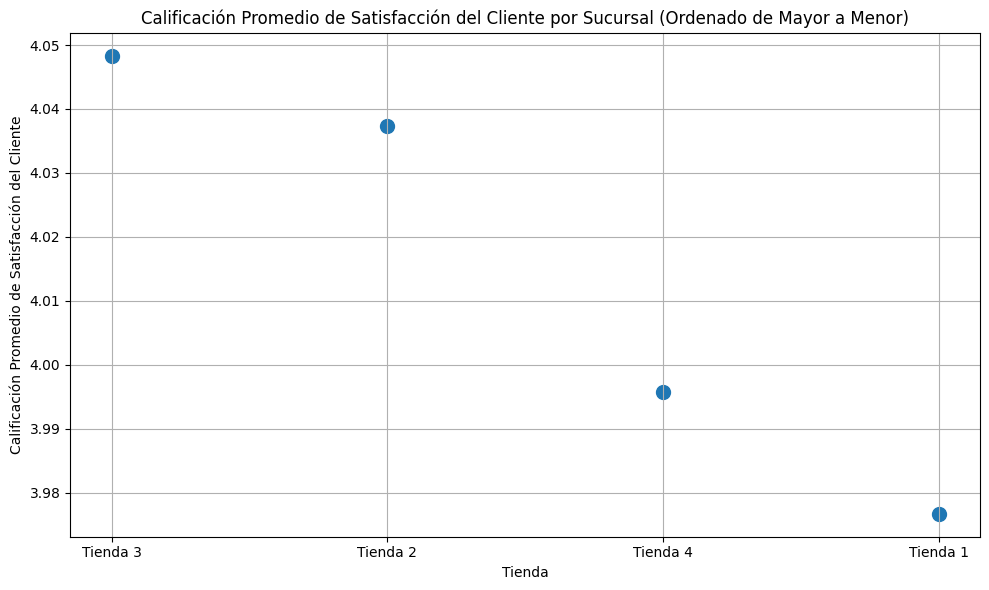

In [61]:

import pandas as pd
import matplotlib.pyplot as plt

all_tiendas = pd.concat([
    tienda.assign(Tienda='Tienda 1'),
    tienda2.assign(Tienda='Tienda 2'),
    tienda3.assign(Tienda='Tienda 3'),
    tienda4.assign(Tienda='Tienda 4')
])


average_ratings = all_tiendas.groupby('Tienda')['Calificación'].mean().reset_index()
average_ratings_sorted = average_ratings.sort_values(by='Calificación', ascending=False)

plt.figure(figsize=(10, 6))
plt.scatter(average_ratings_sorted['Tienda'], average_ratings_sorted['Calificación'], s=100) # s is the size of the points

plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio de Satisfacción del Cliente')
plt.title('Calificación Promedio de Satisfacción del Cliente por Sucursal (Ordenado de Mayor a Menor)')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

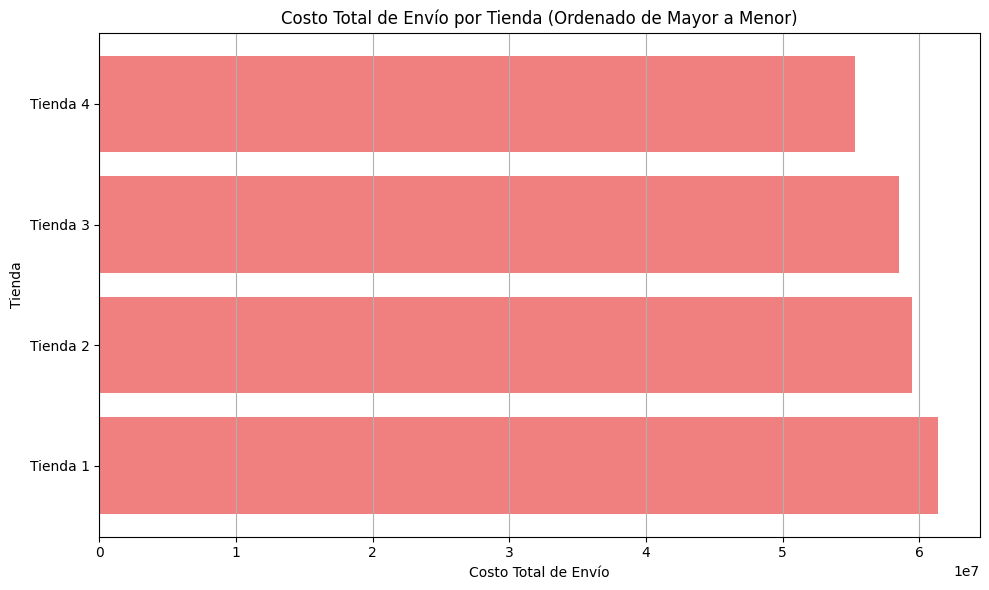

In [62]:

import matplotlib.pyplot as plt
total_shipping_cost = all_tiendas.groupby('Tienda')['Costo de envío'].sum().reset_index()
total_shipping_cost_sorted = total_shipping_cost.sort_values(by='Costo de envío', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(total_shipping_cost_sorted['Tienda'], total_shipping_cost_sorted['Costo de envío'], color='lightcoral')
plt.xlabel('Costo Total de Envío')
plt.ylabel('Tienda')
plt.title('Costo Total de Envío por Tienda (Ordenado de Mayor a Menor)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [49]:
total_shipping_cost = all_tiendas.groupby('Tienda')['Costo de envío'].sum().reset_index()
total_shipping_cost_sorted = total_shipping_cost.sort_values(by='Costo de envío', ascending=False)

print("--- Costo Total de Envío por Tienda (Ordenado de Mayor a Menor) ---")
print(total_shipping_cost_sorted)
print("\n")

--- Costo Total de Envío por Tienda (Ordenado de Mayor a Menor) ---
     Tienda  Costo de envío
0  Tienda 1      61377900.0
1  Tienda 2      59485100.0
2  Tienda 3      58516600.0
3  Tienda 4      55317400.0




In [51]:

import pandas as pd
total_revenue_per_store = all_tiendas.groupby('Tienda')['Precio'].sum().reset_index()
total_shipping_cost_per_store = all_tiendas.groupby('Tienda')['Costo de envío'].sum().reset_index()

contribution_margin = pd.merge(total_revenue_per_store, total_shipping_cost_per_store, on='Tienda')
contribution_margin['Margen de Contribución'] = contribution_margin['Precio'] - contribution_margin['Costo de envío']
contribution_margin['Margen de Contribución (%)'] = (contribution_margin['Margen de Contribución'] / contribution_margin['Precio']) * 100
contribution_margin['Margen de Contribución (%)'] = contribution_margin['Margen de Contribución (%)'].fillna(0)
contribution_margin_sorted = contribution_margin.sort_values(by='Margen de Contribución (%)', ascending=True)

print("--- Margen de Contribución Total por Tienda (en porcentaje, ordenado de menor a mayor rendimiento) ---")
print(contribution_margin_sorted[['Tienda', 'Margen de Contribución (%)']].round(2))
print("\n")

--- Margen de Contribución Total por Tienda (en porcentaje, ordenado de menor a mayor rendimiento) ---
     Tienda  Margen de Contribución (%)
0  Tienda 1                       94.67
2  Tienda 3                       94.67
1  Tienda 2                       94.67
3  Tienda 4                       94.67




In [63]:
# Se obtiene el porcentaje en que cada tienda participa en las utilidades netas

import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


# Margen de contribución total para cada tienda
tienda['Margen_Contribucion'] = tienda['Precio'] - tienda['Costo de envío']
tienda2['Margen_Contribucion'] = tienda2['Precio'] - tienda2['Costo de envío']
tienda3['Margen_Contribucion'] = tienda3['Precio'] - tienda3['Costo de envío']
tienda4['Margen_Contribucion'] = tienda4['Precio'] - tienda4['Costo de envío']

# Total del margen de contribución por tienda
total_margen_tienda1 = tienda['Margen_Contribucion'].sum()
total_margen_tienda2 = tienda2['Margen_Contribucion'].sum()
total_margen_tienda3 = tienda3['Margen_Contribucion'].sum()
total_margen_tienda4 = tienda4['Margen_Contribucion'].sum()

# Recalculo de total de ventas por tienda
ingreso_total_tienda1 = tienda['Precio'].sum()
ingreso_total_tienda2 = tienda2['Precio'].sum()
ingreso_total_tienda3 = tienda3['Precio'].sum()
ingreso_total_tienda4 = tienda4['Precio'].sum()


# Promedio de margen de contribución total por tienda
ratio_margen_tienda1 = total_margen_tienda1 / ingreso_total_tienda1
ratio_margen_tienda2 = total_margen_tienda2 / ingreso_total_tienda2
ratio_margen_tienda3 = total_margen_tienda3 / ingreso_total_tienda3
ratio_margen_tienda4 = total_margen_tienda4 / ingreso_total_tienda4

print(f"Ratio de Margen de Contribución Tienda 1: {ratio_margen_tienda1:.2f}")
print(f"Ratio de Margen de Contribución Tienda 2: {ratio_margen_tienda2:.2f}")
print(f"Ratio de Margen de Contribución Tienda 3: {ratio_margen_tienda3:.2f}")
print(f"Ratio de Margen de Contribución Tienda 4: {ratio_margen_tienda4:.2f}")

Ratio de Margen de Contribución Tienda 1: 0.95
Ratio de Margen de Contribución Tienda 2: 0.95
Ratio de Margen de Contribución Tienda 3: 0.95
Ratio de Margen de Contribución Tienda 4: 0.95


# INFORME FINAL

**ingresos totales de las tiendas.**

Ingreso total Tienda 1: 1150880400,0

Ingreso total Tienda 2: 1116343500,0

Ingreso total Tienda 3: 1098019600,0

Ingreso total Tienda 4: 1038375700,0

**categorías de productos más y menos vendidas.**

categoria mas vendida: Electrónicos  429493500.0

categoria menos vendida: Libros  8784900.0

**Los productos más y menos vendidos.**

Tienda 1
Más Vendidos: TV LED UHD 4K 142150200.0
Menos Vendidos: Cuerda para saltar 652800.0

Tienda 2
Más Vendidos: Iphone 15 - 113225800.0
Menos Vendidos: Cubo mágico 8x8 - 643600.0

Tienda 3
Más Vendidos: Refrigerador     99889700.0
Menos Vendidos: Cubo mágico 8x8 640400.0

Tienda 4
Más Vendidos: Iphone 15  96697500.0
Menos Vendidos: Cuerda para saltar 704800.0

**calificaciones promedio de los clientes por tienda.**

Calificación promedio de la tienda 1: 3.98

Calificación promedio de la tienda 2: 4.04

Calificación promedio de la tienda 3: 4.05

Calificación promedio de la tienda 4: 4.00

**El coste de envío promedio para cada tienda.**

Tienda 1:     61377900.0

Tienda 2:     59485100.0

Tienda 3:     58516600.0

Tienda 4:     55317400.0

**Conclusión**

El informe arroja que a pesar de que hay sucursales que presentan mayor valor de ventas brutas, en proporcion al costo todas tienen un porcentaje del 5.33% de costos de ventas (costo de envio), por lo que la opcion a cerrar sería la **tienda 1** debido a otro factor a considerar: la calificacion de satisfaccion al cliente, siendo la antes mencionada la que peor promedio de calificacion tiene